In [2]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import time




In [5]:
driver = webdriver.Safari()
driver.get('https://www.amazon.co.uk/')  

try:
    search_box = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.ID, 'twotabsearchtextbox'))
    )
    search_box.send_keys('swimwear')
    search_box.send_keys(Keys.RETURN)
except Exception as e:
    print("An error occurred: ", e)
    driver.quit()

product_list = []
for page in range(1, 6):  
    time.sleep(2) 
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    
    products = soup.find_all('div', {'data-component-type': 's-search-result'})
    
    for product in products:
        title = product.h2.text if product.h2 else 'N/A'
        url = 'https://www.amazon.co.uk' + product.h2.a['href'] if product.h2 and product.h2.a else 'N/A'
        try:
            price = product.find('span', 'a-offscreen').text
        except AttributeError:
            price = 'N/A'
        try:
            rating = product.find('span', 'a-icon-alt').text
        except AttributeError:
            rating = 'N/A'
        try:
            review_count = product.find('span', {'class': 'a-size-base'}).text
        except AttributeError:
            review_count = 'N/A'
        
        product_list.append([title, url, price, rating, review_count])
    
    try:
        next_button = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.XPATH, '//a[@class="s-pagination-item s-pagination-next"]'))
        )
        next_button.click()
    except Exception as e:
        print("An error occurred: ", e)
        break  
driver.quit()

df = pd.DataFrame(product_list, columns=['Title', 'URL', 'Price', 'Rating', 'ReviewCount'])
df.to_csv('amazon_products.csv', index=False)

df.head()


An error occurred:  Message: 



,Title,URL,Price,Rating,ReviewCount
0,Zoggs,N/A,£38.98,4.5 out of 5 stars,"1,040"
1,Harry Bear,N/A,£12.99,5.0 out of 5 stars,1
2,Bsrpolry,N/A,£19.99,4.1 out of 5 stars,28
3,iCKER,N/A,£19.99,4.4 out of 5 stars,196
4,DOULAFASS,N/A,£21.99,4.2 out of 5 stars,"1,148"


In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Load Data
df = pd.read_csv('amazon_products.csv')

# Clean Data
df['Price'] = df['Price'].replace('[£,\$]', '', regex=True).astype(float)
df['Rating'] = df['Rating'].str.extract('(\d+\.\d+)').astype(float)

df['ReviewCount'] = df['ReviewCount'].replace('[^0-9]', '', regex=True)
df['ReviewCount'] = pd.to_numeric(df['ReviewCount'], errors='coerce').fillna(0).astype(int)
np.random.seed(42)
df['EstimatedSales'] = np.random.randint(1, 1000, size=len(df))

# Select Features and Target Variable
features = ['Price', 'Rating', 'ReviewCount']
X = df[features]
y = df['EstimatedSales']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R²: {r2}')

# Predictions
df['SalesPrediction'] = model.predict(X.fillna(0))
joblib.dump(model, 'sales_estimation_model.pkl')


Mean Squared Error: 144590.01006508333
R²: -0.24420340922117711


['sales_estimation_model.pkl']

In [13]:
df

,Title,URL,Price,Rating,ReviewCount,EstimatedSales,SalesPrediction
0,Zoggs,NaN,38.98,4.5,1040,103,672.330
1,Harry Bear,NaN,12.99,5.0,1,436,429.830
2,Bsrpolry,NaN,19.99,4.1,28,861,724.940
3,iCKER,NaN,19.99,4.4,196,271,387.910
4,DOULAFASS,NaN,21.99,4.2,1148,107,195.850
5,CUPSHE,NaN,29.99,4.5,30704,72,373.141
6,GRACE KARIN,NaN,26.99,4.7,82,701,532.830
7,CUPSHE,NaN,29.99,4.3,10145,21,168.060
8,CUPSHE,NaN,29.99,4.4,14332,615,464.987
9,Joweechy,NaN,23.99,4.6,605,122,323.090


In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Load Data
df = pd.read_csv('amazon_products.csv')

# Clean Data
df['Price'] = df['Price'].replace('[£,\$]', '', regex=True).astype(float)
df['Rating'] = df['Rating'].str.extract('(\d+\.\d+)').astype(float)

# Clean 'ReviewCount' by extracting only numeric values and setting invalid entries to NaN
df['ReviewCount'] = df['ReviewCount'].replace('[^0-9]', '', regex=True)
df['ReviewCount'] = pd.to_numeric(df['ReviewCount'], errors='coerce').fillna(0).astype(int)

# Generate a dummy 'Estimated Sales' column for demonstration
np.random.seed(42)
df['EstimatedSales'] = np.random.randint(1, 1000, size=len(df))

# Select Features and Target Variable
features = ['Price', 'Rating', 'ReviewCount']
X = df[features]
y = df['EstimatedSales']
X = X.fillna(0)

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R²: {r2}')

joblib.dump(best_model, 'sales_estimation_model.pkl')


Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Mean Squared Error: 120236.94765624336
R²: -0.03464423386448434


['sales_estimation_model.pkl']

In [16]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import time
from bs4 import BeautifulSoup

driver = webdriver.Safari()
driver.get('https://www.amazon.co.uk/') 

try:
    search_box = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.ID, 'twotabsearchtextbox'))
    )
    search_box.send_keys('swimwear')
    search_box.send_keys(Keys.RETURN)
except Exception as e:
    print("An error occurred: ", e)
    driver.quit()

product_list = []

# Loop through the first 6 pages
for page in range(1, 6):  
    time.sleep(2) 
    
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    
    products = soup.find_all('div', {'data-component-type': 's-search-result'})
    
    for product in products:
        title = product.h2.text if product.h2 else 'N/A'
        url = 'https://www.amazon.co.uk' + product.h2.a['href'] if product.h2 and product.h2.a else 'N/A'
        try:
            price = product.find('span', 'a-offscreen').text
        except AttributeError:
            price = 'N/A'
        try:
            rating = product.find('span', 'a-icon-alt').text
        except AttributeError:
            rating = 'N/A'
        try:
            review_count = product.find('span', {'class': 'a-size-base'}).text
        except AttributeError:
            review_count = 'N/A'
        
        # Check if 'Units Sold' information is available
        units_sold_elem = product.find('span', string=lambda text: 'bought in past month' in str(text).lower())
        if units_sold_elem:
            units_sold = units_sold_elem.text.strip()
        else:
            units_sold = 'N/A'
        
        product_list.append([title, url, price, rating, review_count, units_sold])
    
    # Run to the next page
    try:
        next_button = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.XPATH, '//a[@class="s-pagination-item s-pagination-next"]'))
        )
        next_button.click()
    except Exception as e:
        print("An error occurred: ", e)
        break  # No more pages to navigate

driver.quit()

df = pd.DataFrame(product_list, columns=['Title', 'URL', 'Price', 'Rating', 'ReviewCount', 'UnitsSold'])
df.to_csv('amazon_products.csv', index=False)
df.head()


An error occurred:  Message: 



,Title,URL,Price,Rating,ReviewCount,UnitsSold
0,AMAGGIGO,N/A,£22.09,4.3 out of 5 stars,"1,119",N/A
1,Sam Caan,N/A,£12.99,4.2 out of 5 stars,18,N/A
2,Sixyotie,N/A,£26.98,4.3 out of 5 stars,35,N/A
3,OAMENXI,N/A,£22.94,4.3 out of 5 stars,910,N/A
4,DOULAFASS,N/A,£21.99,4.2 out of 5 stars,"1,148",N/A


# Test 

In [1]:
import numpy as np

# BSR values for Item 1
item1_bsr = [
    47018, 46821, 51273, 50996, 55537, 53567, 53677, 52380, 52808, 53395,
    30629, 32038, 36611, 45217, 44242, 44554, 50416, 48065, 21292, 34520,
    34464, 43719, 48889, 45749, 48348, 52281, 51623, 54253, 53859, 57027,
    55836, 55434, 55712, 56839, 56471, 18093, 20396, 33212, 41525, 39927,
    43527, 19003, 18707, 32102, 11040, 16416, 13530, 13656, 17660, 4433,
    5435, 6372, 1556, 1836, 1551, 2166, 1196, 1684, 1232, 983, 1193, 1047,
    1239, 1100, 1256, 1099, 904, 956, 1088, 1242, 1006, 773, 807, 916, 1115,
    957, 908, 954, 677, 686
]

# Calculate average BSR for Item 1
avg_bsr_item1 = np.mean(item1_bsr)
avg_bsr_item1


25784.0125

In [2]:
# BSR values for Item 2
item2_bsr = [
    4169, 4946, 3210, 3003, 3688, 2585, 3030, 2475, 3036, 3152, 3037, 2484,
    3132, 3498, 4873, 4985, 3055, 2809, 3166, 2100, 2583, 2923, 3150, 2460,
    1953, 2938, 2719, 2862, 3782, 2557, 2380, 3512, 2760, 3247, 2634, 2353,
    2541, 2403, 3065, 2766, 3013, 2678, 2789, 2294, 2177, 2306, 1936, 2769,
    3265, 2309, 1606, 1999, 2390, 2796, 2383, 2379, 3535, 3296, 2048, 2039,
    2258, 2325, 1676, 2720, 2424, 2531, 2627, 2420, 2376, 2650, 1900, 2089,
    1802, 1958, 1562, 1765, 2111, 1829, 1825, 1320, 1338, 2310, 1371, 1507,
    1577, 1588, 1328, 1466, 2322
]

# Calculate average BSR for Item 2
avg_bsr_item2 = np.mean(item2_bsr)
avg_bsr_item2


2573.067415730337

In [3]:
# BSR values for Item 3
item3_bsr = [
    3753, 4164, 4881, 5865, 8664, 5268, 6100, 4687, 3791, 4121, 3931, 5175,
    5224, 5794, 5303, 6076, 10001, 5476, 6899, 4628, 5033, 5687, 7552, 6539,
    4674, 4298, 5182, 5887, 4762, 6224, 4605, 4280, 5579, 3878, 7281, 6480,
    7201, 7268, 8391, 7457, 4784, 4531, 3409, 4640, 4014, 4719, 3274, 4088,
    4571, 4697, 4482, 6466, 7212, 7276, 4720, 4375, 4342, 5255, 4182, 4806,
    5055, 5818, 7791, 5619, 5641, 5601, 3256, 4338, 5228, 4821, 5748, 3858,
    4824, 3480, 3426, 3675, 3617, 4668, 5298, 5896, 7960, 5509, 4786, 6415,
    9658, 7485, 6108
]

# Calculate average BSR for Item 3
avg_bsr_item3 = np.mean(item3_bsr)
avg_bsr_item3


5396.333333333333

In [4]:
from scipy.optimize import curve_fit

# Define power law function
def power_law(x, a, k):
    return k * np.power(x, a)

# Average BSR values
avg_bsr_values = [avg_bsr_item1, avg_bsr_item2, avg_bsr_item3]

# Sales values
sales_values = [265, 408, 209]

# Fit the curve
params, _ = curve_fit(power_law, avg_bsr_values, sales_values)

# Extracting the parameters
a, k = params
a, k


(-0.19766548133339004, 1663.002774235962)

In [5]:
avg_bsr_values = [avg_bsr_item1, avg_bsr_item2, avg_bsr_item3]
sales_values = [265, 408, 209]

params, _ = curve_fit(power_law, avg_bsr_values, sales_values)

a, k = params
a, k


(-0.19766548133339004, 1663.002774235962)

In [14]:
#test power law model
EstSales1= k*avg_bsr_item1**a
EstSales2= k*avg_bsr_item2**a
EstSales3= k*avg_bsr_item3**a
print(EstSales1,EstSales2,EstSales3)

223.31672655249332 352.1798487455544 304.218677673866


# test 2

In [18]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load the data from the Excel file
file_path = r'C:\Users\Lenovo\OneDrive\Desktop\amaz\chart.xlsx'
data = pd.read_excel(file_path, engine='openpyxl')

# Extract the data for each item
items = []
total_sales = [265, 408, 209]  # Total sales for items 1 to 3
for i in range(0, 12, 2):
    item_data = data.iloc[:, i:i+2]
    item_data.columns = ['Time', 'BSR']  # Renaming to 'BSR' to reflect its usage
    item_data['Item'] = f'Item{(i//2) + 1}'
    if i < 6:  # Only for items 1 to 3
        item_data['Total Sales'] = total_sales[i//2]
    items.append(item_data)

# Combine data for Items 1-3 (training data) and Items 4-6 (testing data)
train_data = pd.concat(items[:3], ignore_index=True)
test_data = pd.concat(items[3:], ignore_index=True)

# Convert the Time column to datetime type
train_data['Time'] = pd.to_datetime(train_data['Time'], errors='coerce')
test_data['Time'] = pd.to_datetime(test_data['Time'], errors='coerce')

# Ensure no NaT values in the Time column and sort by Time
train_data = train_data.dropna(subset=['Time']).sort_values(by='Time')
test_data = test_data.dropna(subset=['Time']).sort_values(by='Time')

# Summarize BSR data for the month for items 1 to 3
train_summary = train_data.groupby('Item').agg({
    'BSR': ['mean', 'std', 'min', 'max', 'median', 'sum']
}).reset_index()
train_summary.columns = ['Item', 'BSR_mean', 'BSR_std', 'BSR_min', 'BSR_max', 'BSR_median', 'BSR_sum']
train_summary['Total Sales'] = total_sales

# Prepare the training data for the model
X_train = train_summary[['BSR_mean', 'BSR_std', 'BSR_min', 'BSR_max', 'BSR_median', 'BSR_sum']]
y_train = train_summary['Total Sales']

# Summarize BSR data for items 4 to 6
test_summary = test_data.groupby('Item').agg({
    'BSR': ['mean', 'std', 'min', 'max', 'median', 'sum']
}).reset_index()
test_summary.columns = ['Item', 'BSR_mean', 'BSR_std', 'BSR_min', 'BSR_max', 'BSR_median', 'BSR_sum']

# Prepare the test data for the model
X_test = test_summary[['BSR_mean', 'BSR_std', 'BSR_min', 'BSR_max', 'BSR_median', 'BSR_sum']]

# Initialize the models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the models
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Make predictions on the test set
rf_predictions = rf_model.predict(X_test)
gb_predictions = gb_model.predict(X_test)

# Print aggregated predictions
test_summary['rf_predictions'] = rf_predictions
test_summary['gb_predictions'] = gb_predictions

print("Predicted monthly sales for Items 4, 5, 6 using Random Forest:", test_summary[['Item', 'rf_predictions']].to_dict())
print("Predicted monthly sales for Items 4, 5, 6 using Gradient Boosting:", test_summary[['Item', 'gb_predictions']].to_dict())

# Debugging - Check the BSR values for items 4 and 5
print("BSR values for Items 4, 5, 6 in test data:")
print(test_summary[['Item', 'BSR_mean', 'BSR_std', 'BSR_min', 'BSR_max', 'BSR_median', 'BSR_sum']])


Predicted monthly sales for Items 4, 5, 6 using Random Forest: {'Item': {0: 'Item4', 1: 'Item5', 2: 'Item6'}, 'rf_predictions': {0: 269.51, 1: 263.79, 2: 346.81}}
Predicted monthly sales for Items 4, 5, 6 using Gradient Boosting: {'Item': {0: 'Item4', 1: 'Item5', 2: 'Item6'}, 'gb_predictions': {0: 209.00225771890544, 1: 209.00225771890544, 2: 407.99697200052685}}
BSR values for Items 4, 5, 6 in test data:
    Item      BSR_mean      BSR_std  BSR_min  BSR_max  BSR_median    BSR_sum
0  Item4   9679.022727  4045.351602   3089.0  24564.0      9121.5   851754.0
1  Item5  12627.862069  4410.373201   4975.0  27446.0     12343.0  1098624.0
2  Item6   2888.011236   837.470508   1817.0   5730.0      2597.0   257033.0


In [24]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.exceptions import ConvergenceWarning
import numpy as np
import warnings

# Ignore convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Load the data from the Excel file
file_path = r'C:\Users\Lenovo\OneDrive\Desktop\amaz\chart.xlsx'
data = pd.read_excel(file_path, engine='openpyxl')

# Extract the data for each item
items = []
total_sales = [265, 408, 209]  # Total sales for items 1 to 3
for i in range(0, 12, 2):
    item_data = data.iloc[:, i:i+2]
    item_data.columns = ['Time', 'BSR']  # Renaming to 'BSR' to reflect its usage
    item_data['Item'] = f'Item{(i//2) + 1}'
    if i < 6:  # Only for items 1 to 3
        item_data['Total Sales'] = total_sales[i//2]
    items.append(item_data)

# Combine data for Items 1-3 (training data) and Items 4-6 (testing data)
train_data = pd.concat(items[:3], ignore_index=True)
test_data = pd.concat(items[3:], ignore_index=True)

# Convert the Time column to datetime type
train_data['Time'] = pd.to_datetime(train_data['Time'], errors='coerce')
test_data['Time'] = pd.to_datetime(test_data['Time'], errors='coerce')

# Ensure no NaT values in the Time column and sort by Time
train_data = train_data.dropna(subset=['Time']).sort_values(by='Time')
test_data = test_data.dropna(subset=['Time']).sort_values(by='Time')

# Summarize BSR data for the month for items 1 to 3
train_summary = train_data.groupby('Item').agg({
    'BSR': ['mean', 'std', 'min', 'max', 'median', 'sum']
}).reset_index()
train_summary.columns = ['Item', 'BSR_mean', 'BSR_std', 'BSR_min', 'BSR_max', 'BSR_median', 'BSR_sum']
train_summary['Total Sales'] = total_sales

# Summarize BSR data for items 4 to 6
test_summary = test_data.groupby('Item').agg({
    'BSR': ['mean', 'std', 'min', 'max', 'median', 'sum']
}).reset_index()
test_summary.columns = ['Item', 'BSR_mean', 'BSR_std', 'BSR_min', 'BSR_max', 'BSR_median', 'BSR_sum']

# Prepare the training and test data
X_train = train_summary[['BSR_mean', 'BSR_std', 'BSR_min', 'BSR_max', 'BSR_median', 'BSR_sum']]
y_train = train_summary['Total Sales']
X_test = test_summary[['BSR_mean', 'BSR_std', 'BSR_min', 'BSR_max', 'BSR_median', 'BSR_sum']]

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the models
rf_model = RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_split=2, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
ridge_model = Ridge(alpha=1.0, solver='svd')  # Changed solver to 'svd'
lasso_model = Lasso(alpha=0.1)

# Train the models
rf_model.fit(X_train_scaled, y_train)
gb_model.fit(X_train_scaled, y_train)
ridge_model.fit(X_train_scaled, y_train)
lasso_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
rf_predictions = rf_model.predict(X_test_scaled)
gb_predictions = gb_model.predict(X_test_scaled)
ridge_predictions = ridge_model.predict(X_test_scaled)
lasso_predictions = lasso_model.predict(X_test_scaled)

# Print predictions
test_summary['rf_predictions'] = rf_predictions
test_summary['gb_predictions'] = gb_predictions
test_summary['ridge_predictions'] = ridge_predictions
test_summary['lasso_predictions'] = lasso_predictions

print("Random Forest predictions for Items 4, 5, 6:", test_summary[['Item', 'rf_predictions']].to_dict())
print("Gradient Boosting predictions for Items 4, 5, 6:", test_summary[['Item', 'gb_predictions']].to_dict())
print("Ridge predictions for Items 4, 5, 6:", test_summary[['Item', 'ridge_predictions']].to_dict())
print("Lasso predictions for Items 4, 5, 6:", test_summary[['Item', 'lasso_predictions']].to_dict())

# Feature importance for RandomForest
rf_feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("Random Forest feature importances:")
print(rf_feature_importances)

# Feature importance for GradientBoosting
gb_feature_importances = pd.Series(gb_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("Gradient Boosting feature importances:")
print(gb_feature_importances)


Random Forest predictions for Items 4, 5, 6: {'Item': {0: 'Item4', 1: 'Item5', 2: 'Item6'}, 'rf_predictions': {0: 267.675, 1: 262.67, 2: 353.65}}
Gradient Boosting predictions for Items 4, 5, 6: {'Item': {0: 'Item4', 1: 'Item5', 2: 'Item6'}, 'gb_predictions': {0: 209.00000005996813, 1: 209.00000005996813, 2: 407.999999919572}}
Ridge predictions for Items 4, 5, 6: {'Item': {0: 'Item4', 1: 'Item5', 2: 'Item6'}, 'ridge_predictions': {0: 224.22296783468155, 1: 100.91019076024264, 2: 340.96061154654336}}
Lasso predictions for Items 4, 5, 6: {'Item': {0: 'Item4', 1: 'Item5', 2: 'Item6'}, 'lasso_predictions': {0: 174.67060224711884, 1: -15.4952578676494, 2: 359.86324258079765}}
Random Forest feature importances:
BSR_sum       0.204122
BSR_median    0.187077
BSR_max       0.169609
BSR_std       0.168340
BSR_mean      0.166042
BSR_min       0.104811
dtype: float64
Gradient Boosting feature importances:
BSR_mean      0.305407
BSR_median    0.259532
BSR_sum       0.195886
BSR_max       0.135583
B

In [28]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
import numpy as np

# Load the data from the Excel file
file_path = r'C:\Users\Lenovo\OneDrive\Desktop\amaz\chart.xlsx'
data = pd.read_excel(file_path, engine='openpyxl')

# Extract the data for each item
items = []
total_sales = [265, 408, 209]  # Total sales for items 1 to 3
for i in range(0, 12, 2):
    item_data = data.iloc[:, i:i+2]
    item_data.columns = ['Time', 'BSR']  # Renaming to 'BSR' to reflect its usage
    item_data['Item'] = f'Item{(i//2) + 1}'
    if i < 6:  # Only for items 1 to 3
        item_data['Total Sales'] = total_sales[i//2]
    items.append(item_data)

# Combine data for Items 1-3 (training data) and Items 4-6 (testing data)
train_data = pd.concat(items[:3], ignore_index=True)
test_data = pd.concat(items[3:], ignore_index=True)

# Convert the Time column to datetime type
train_data['Time'] = pd.to_datetime(train_data['Time'], errors='coerce')
test_data['Time'] = pd.to_datetime(test_data['Time'], errors='coerce')

# Ensure no NaT values in the Time column and sort by Time
train_data = train_data.dropna(subset=['Time']).sort_values(by='Time')
test_data = test_data.dropna(subset=['Time']).sort_values(by='Time')

# Summarize BSR data for the month for items 1 to 3
train_summary = train_data.groupby('Item').agg({
    'BSR': ['mean', 'std', 'min', 'max', 'median', 'sum']
}).reset_index()
train_summary.columns = ['Item', 'BSR_mean', 'BSR_std', 'BSR_min', 'BSR_max', 'BSR_median', 'BSR_sum']
train_summary['Total Sales'] = total_sales

# Summarize BSR data for items 4 to 6
test_summary = test_data.groupby('Item').agg({
    'BSR': ['mean', 'std', 'min', 'max', 'median', 'sum']
}).reset_index()
test_summary.columns = ['Item', 'BSR_mean', 'BSR_std', 'BSR_min', 'BSR_max', 'BSR_median', 'BSR_sum']

# Prepare the training and test data
X_train = train_summary[['BSR_mean', 'BSR_std', 'BSR_min', 'BSR_max', 'BSR_median', 'BSR_sum']]
y_train = train_summary['Total Sales']
X_test = test_summary[['BSR_mean', 'BSR_std', 'BSR_min', 'BSR_max', 'BSR_median', 'BSR_sum']]

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train multiple models
models = {
    'RandomForest': RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_split=2, random_state=42),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42),
    'Ridge': Ridge(alpha=1.0, solver='svd'),
    'Lasso': Lasso(alpha=0.1),
    'AdaBoost': AdaBoostRegressor(n_estimators=200, learning_rate=0.1, random_state=42),
    'SVR': SVR(C=1.0, epsilon=0.2)
}

# Evaluate the models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    mae = mean_absolute_error([131, 96, 370], predictions)
    results[name] = {
        'predictions': predictions,
        'mae': mae
    }

# Print the results
for name, result in results.items():
    print(f"{name} predictions for Items 4, 5, 6:", dict(zip(['Item4', 'Item5', 'Item6'], result['predictions'])))
    print(f"{name} MAE: {result['mae']}")

# Print feature importances for tree-based models
for name, model in models.items():
    if hasattr(model, 'feature_importances_'):
        feature_importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
        print(f"{name} feature importances:")
        print(feature_importances)


RandomForest predictions for Items 4, 5, 6: {'Item4': 267.675, 'Item5': 262.67, 'Item6': 353.65}
RandomForest MAE: 106.56500000000001
GradientBoosting predictions for Items 4, 5, 6: {'Item4': 209.00000005996813, 'Item5': 209.00000005996813, 'Item6': 407.999999919572}
GradientBoosting MAE: 76.33333334650276
Ridge predictions for Items 4, 5, 6: {'Item4': 224.22296783468155, 'Item5': 100.91019076024264, 'Item6': 340.96061154654336}
Ridge MAE: 42.39084901612694
Lasso predictions for Items 4, 5, 6: {'Item4': 174.67060224711884, 'Item5': -15.4952578676494, 'Item6': 359.86324258079765}
Lasso MAE: 55.10087251132353
AdaBoost predictions for Items 4, 5, 6: {'Item4': 209.0, 'Item5': 209.0, 'Item6': 408.0}
AdaBoost MAE: 76.33333333333333
SVR predictions for Items 4, 5, 6: {'Item4': 264.5911384042137, 'Item5': 264.6400008190844, 'Item6': 265.24883412422804}
SVR MAE: 135.66076836635668
RandomForest feature importances:
BSR_sum       0.204122
BSR_median    0.187077
BSR_max       0.169609
BSR_std     

# Item 4: 131,  Item 5:96,   Item 6: 370 
based on Helium10 data.

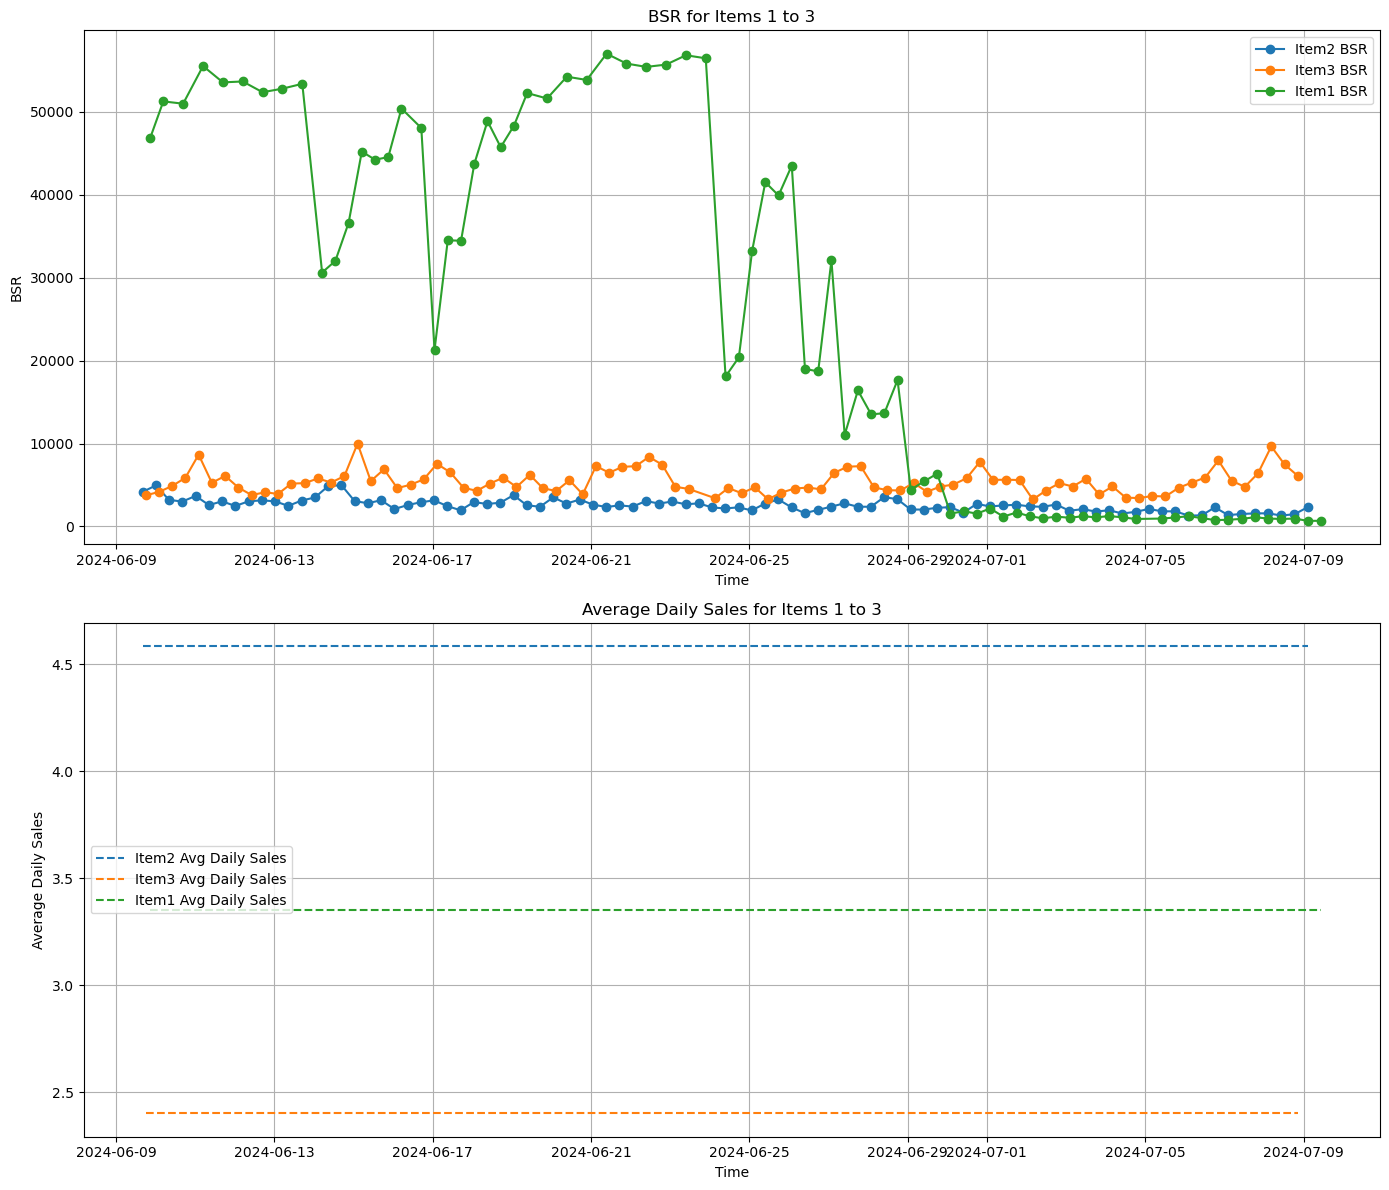

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data from the Excel file
file_path = r'C:\Users\Lenovo\OneDrive\Desktop\amaz\chart.xlsx'
data = pd.read_excel(file_path, engine='openpyxl')

# Extract the data for each item
items = []
total_sales = [265, 408, 209]  # Total sales for items 1 to 3
for i in range(0, 6, 2):  # Only process items 1 to 3 (columns A-F)
    item_data = data.iloc[:, i:i+2]
    item_data.columns = ['Time', 'BSR']  # Renaming to 'BSR' to reflect its usage
    item_data['Item'] = f'Item{(i//2) + 1}'
    item_data['Total Sales'] = total_sales[i//2]
    items.append(item_data)

# Combine data for Items 1-3
combined_data = pd.concat(items, ignore_index=True)

# Convert the Time column to datetime type
combined_data['Time'] = pd.to_datetime(combined_data['Time'], errors='coerce')

# Ensure no NaT values in the Time column and sort by Time
combined_data = combined_data.dropna(subset=['Time']).sort_values(by='Time')

# Calculate the number of days in the data for each item
days_per_item = combined_data.groupby('Item')['Time'].nunique()

# Calculate average daily sales for each item
average_daily_sales = {f'Item{i+1}': total_sales[i] / days_per_item[f'Item{i+1}'] for i in range(3)}

# Add average daily sales to the dataframe
combined_data['Average Daily Sales'] = combined_data['Item'].map(average_daily_sales)

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 12))

# Plot BSR data
for item in combined_data['Item'].unique():
    item_data = combined_data[combined_data['Item'] == item]
    axes[0].plot(item_data['Time'], item_data['BSR'], label=f'{item} BSR', linestyle='-', marker='o')

# Plot average daily sales
for item in combined_data['Item'].unique():
    item_data = combined_data[combined_data['Item'] == item]
    axes[1].plot(item_data['Time'], item_data['Average Daily Sales'], label=f'{item} Avg Daily Sales', linestyle='--')

# Customize BSR plot
axes[0].set_xlabel('Time')
axes[0].set_ylabel('BSR')
axes[0].set_title('BSR for Items 1 to 3')
axes[0].legend()
axes[0].grid(True)

# Customize Average Daily Sales plot
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Average Daily Sales')
axes[1].set_title('Average Daily Sales for Items 1 to 3')
axes[1].legend()
axes[1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


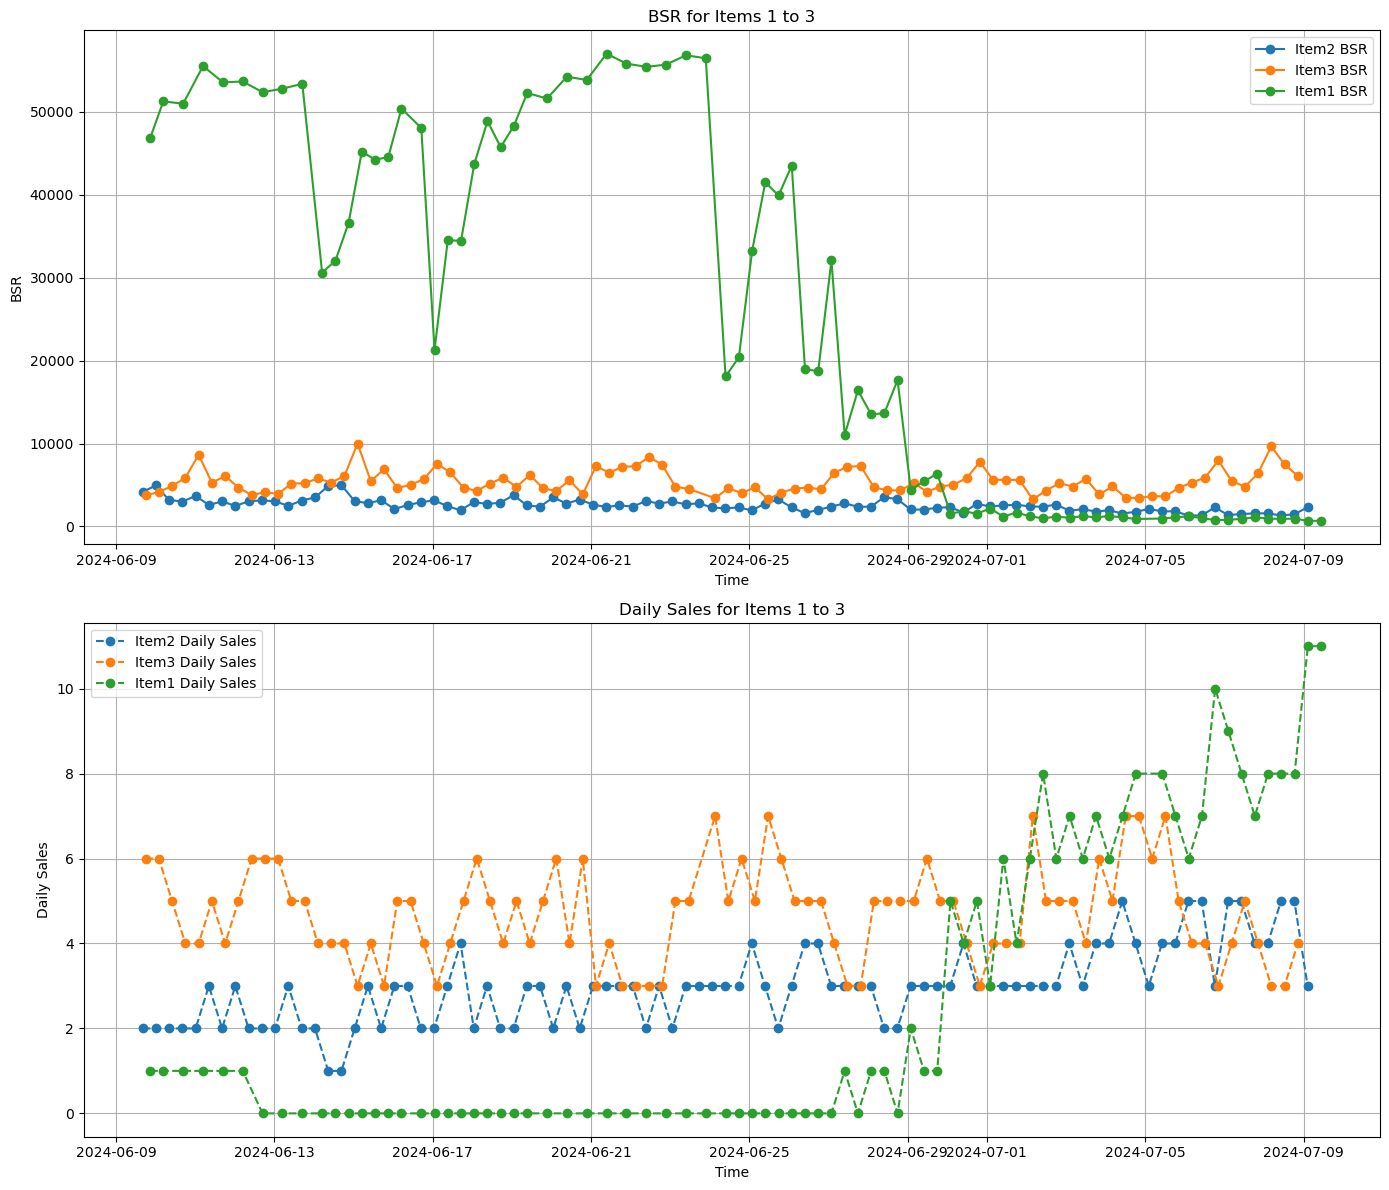

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data from the Excel file
file_path = r'C:\Users\Lenovo\OneDrive\Desktop\amaz\chart.xlsx'
data = pd.read_excel(file_path, engine='openpyxl')

# Extract the data for each item
items = []
total_sales = [265, 408, 209]  # Total sales for items 1 to 3
for i in range(0, 6, 2):  # Only process items 1 to 3 (columns A-F)
    item_data = data.iloc[:, i:i+2]
    item_data.columns = ['Time', 'BSR']  # Renaming to 'BSR' to reflect its usage
    item_data['Item'] = f'Item{(i//2) + 1}'
    item_data['Total Sales'] = total_sales[i//2]
    items.append(item_data)

# Combine data for Items 1-3
combined_data = pd.concat(items, ignore_index=True)

# Convert the Time column to datetime type
combined_data['Time'] = pd.to_datetime(combined_data['Time'], errors='coerce')

# Ensure no NaT values in the Time column and sort by Time
combined_data = combined_data.dropna(subset=['Time']).sort_values(by='Time')

# Simulate daily sales based on inverse of BSR
def simulate_daily_sales(df, total_sales):
    # Inverse of BSR
    df['Inverse_BSR'] = 1 / df['BSR']
    # Normalize inverse BSR
    df['Normalized_Inverse_BSR'] = df['Inverse_BSR'] / df['Inverse_BSR'].sum()
    # Calculate daily sales
    df['Daily_Sales'] = (df['Normalized_Inverse_BSR'] * total_sales).round().astype(int)
    
    # Adjust daily sales to match the total sales
    discrepancy = total_sales - df['Daily_Sales'].sum()
    while discrepancy != 0:
        if discrepancy > 0:
            idx = df['Daily_Sales'].idxmin()
            df.loc[idx, 'Daily_Sales'] += 1
            discrepancy -= 1
        elif discrepancy < 0:
            idx = df['Daily_Sales'].idxmax()
            df.loc[idx, 'Daily_Sales'] -= 1
            discrepancy += 1

    return df

# Apply simulation for each item
simulated_data = pd.DataFrame()
for item, sales in zip(combined_data['Item'].unique(), total_sales):
    item_data = combined_data[combined_data['Item'] == item].copy()
    item_data = simulate_daily_sales(item_data, sales)
    simulated_data = pd.concat([simulated_data, item_data])

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 12))

# Plot BSR data
for item in simulated_data['Item'].unique():
    item_data = simulated_data[simulated_data['Item'] == item]
    axes[0].plot(item_data['Time'], item_data['BSR'], label=f'{item} BSR', linestyle='-', marker='o')

# Plot daily sales
for item in simulated_data['Item'].unique():
    item_data = simulated_data[simulated_data['Item'] == item]
    axes[1].plot(item_data['Time'], item_data['Daily_Sales'], label=f'{item} Daily Sales', linestyle='--', marker='o')

# Customize BSR plot
axes[0].set_xlabel('Time')
axes[0].set_ylabel('BSR')
axes[0].set_title('BSR for Items 1 to 3')
axes[0].legend()
axes[0].grid(True)

# Customize Daily Sales plot
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Daily Sales')
axes[1].set_title('Daily Sales for Items 1 to 3')
axes[1].legend()
axes[1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


Estimated Monthly Sales for Items 4, 5, and 6:
Item4: 298.29
Item5: 289.76
Item6: 317.93


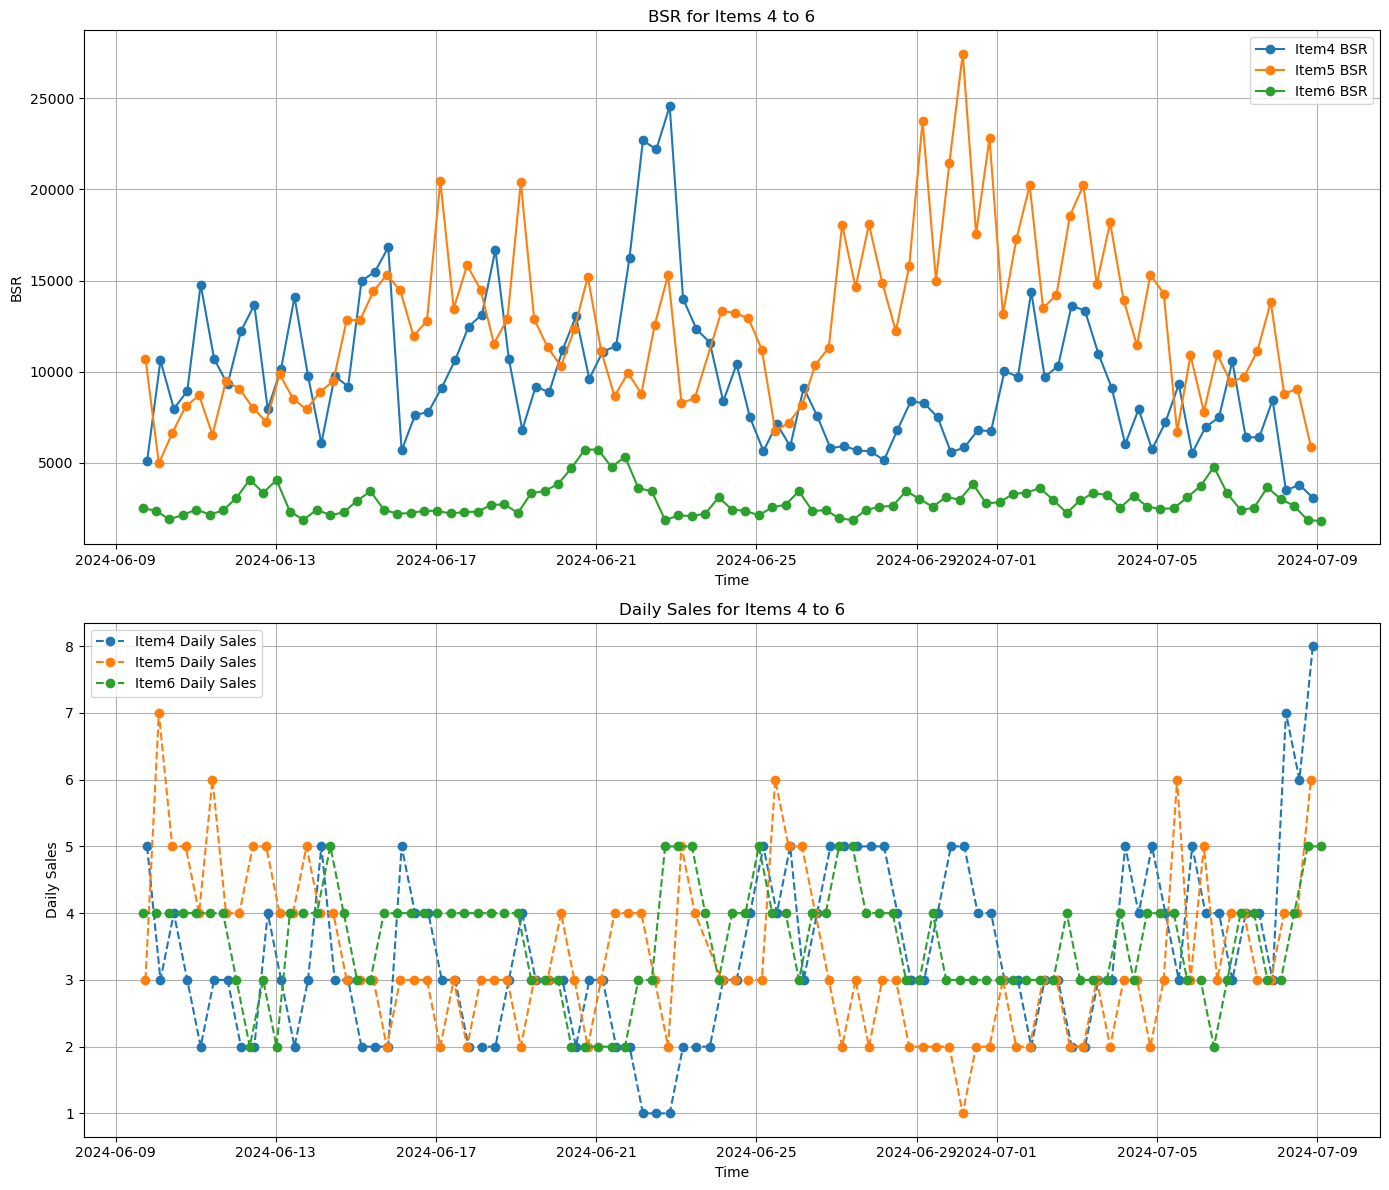

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Load the data from the Excel file
file_path = r'C:\Users\Lenovo\OneDrive\Desktop\amaz\chart.xlsx'
data = pd.read_excel(file_path, engine='openpyxl')

# Extract the data for each item
items = []
total_sales = [265, 408, 209]  # Total sales for items 1 to 3
for i in range(0, 6, 2):  # Only process items 1 to 3 (columns A-F)
    item_data = data.iloc[:, i:i+2]
    item_data.columns = ['Time', 'BSR']  # Renaming to 'BSR' to reflect its usage
    item_data['Item'] = f'Item{(i//2) + 1}'
    item_data['Total Sales'] = total_sales[i//2]
    items.append(item_data)

# Add the data for items 4, 5, and 6
for i in range(6, 12, 2):  # Process items 4 to 6 (columns G-L)
    item_data = data.iloc[:, i:i+2]
    item_data.columns = ['Time', 'BSR']
    item_data['Item'] = f'Item{(i//2) + 1}'
    items.append(item_data)

# Combine all data
combined_data = pd.concat(items, ignore_index=True)

# Convert the Time column to datetime type
combined_data['Time'] = pd.to_datetime(combined_data['Time'], errors='coerce')

# Ensure no NaT values in the Time column and sort by Time
combined_data = combined_data.dropna(subset=['Time']).sort_values(by='Time')

# Aggregate data to get average BSR for each item
average_bsr_data = combined_data.groupby('Item')['BSR'].mean().reset_index()
average_bsr_data = average_bsr_data[average_bsr_data['Item'].isin(['Item1', 'Item2', 'Item3'])]
average_bsr_data['Total Sales'] = total_sales

# Train a linear regression model to predict total sales based on average BSR
X = average_bsr_data[['BSR']]
y = average_bsr_data['Total Sales']
model = LinearRegression()
model.fit(X, y)

# Predict total sales for items 4, 5, and 6
items_4_6_bsr = combined_data[combined_data['Item'].isin(['Item4', 'Item5', 'Item6'])].groupby('Item')['BSR'].mean().reset_index()
items_4_6_bsr['Estimated Sales'] = model.predict(items_4_6_bsr[['BSR']])
estimated_sales = items_4_6_bsr.set_index('Item')['Estimated Sales'].to_dict()

# Print estimated monthly sales for items 4, 5, and 6
print("Estimated Monthly Sales for Items 4, 5, and 6:")
for item, sales in estimated_sales.items():
    print(f"{item}: {sales:.2f}")

# Simulate daily sales based on inverse of BSR
def simulate_daily_sales(df, total_sales):
    # Inverse of BSR
    df['Inverse_BSR'] = 1 / df['BSR']
    # Normalize inverse BSR
    df['Normalized_Inverse_BSR'] = df['Inverse_BSR'] / df['Inverse_BSR'].sum()
    # Calculate daily sales
    df['Daily_Sales'] = (df['Normalized_Inverse_BSR'] * total_sales).round().astype(int)
    
    # Adjust the daily sales to match the total sales
    discrepancy = int(total_sales - df['Daily_Sales'].sum())
    if discrepancy != 0:
        adjustment_indices = df['Daily_Sales'].nlargest(abs(discrepancy)).index if discrepancy < 0 else df['Daily_Sales'].nsmallest(abs(discrepancy)).index
        for idx in adjustment_indices:
            df.loc[idx, 'Daily_Sales'] += int(np.sign(discrepancy))
            discrepancy -= int(np.sign(discrepancy))
            if discrepancy == 0:
                break

    return df

# Apply simulation for items 4-6 based on estimated sales
simulated_data_items_4_6 = pd.DataFrame()
for item in ['Item4', 'Item5', 'Item6']:
    item_data = combined_data[combined_data['Item'] == item].copy()
    estimated_total_sales = estimated_sales[item]
    item_data = simulate_daily_sales(item_data, estimated_total_sales)
    simulated_data_items_4_6 = pd.concat([simulated_data_items_4_6, item_data])

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 12))

# Plot BSR data for items 4-6
for item in simulated_data_items_4_6['Item'].unique():
    item_data = simulated_data_items_4_6[simulated_data_items_4_6['Item'] == item]
    axes[0].plot(item_data['Time'], item_data['BSR'], label=f'{item} BSR', linestyle='-', marker='o')

# Plot daily sales for items 4-6
for item in simulated_data_items_4_6['Item'].unique():
    item_data = simulated_data_items_4_6[simulated_data_items_4_6['Item'] == item]
    axes[1].plot(item_data['Time'], item_data['Daily_Sales'], label=f'{item} Daily Sales', linestyle='--', marker='o')

# Customize BSR plot for items 4-6
axes[0].set_xlabel('Time')
axes[0].set_ylabel('BSR')
axes[0].set_title('BSR for Items 4 to 6')
axes[0].legend()
axes[0].grid(True)

# Customize Daily Sales plot for items 4-6
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Daily Sales')
axes[1].set_title('Daily Sales for Items 4 to 6')
axes[1].legend()
axes[1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()
